# Two Moons

In [1]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mmd import maximum_mean_discrepancy
import two_moon_sim
import config

c:\Users\u2008181\likelihood-free\sbi_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Model

This notebook will demonstrate estimations of a somewhat strange Bayesian model, whose posterior evaluated at the origin $x = (0, 0)$ of the "data" will resemble two crescent moons. The forward process is a noisy non-linear transformation on a 2D plane:

$$
\begin{align*}
x_1 &= -|\theta_1 + \theta_2|/\sqrt{2} + r \cos(\alpha) + 0.25\\
x_2 &= (-\theta_1 + \theta_2)/\sqrt{2} + r\sin{\alpha}
\end{align*}
$$

with $x = (x_1, x_2)$ playing the role of "observables" (data to be learned from), $\alpha \sim \text{Uniform}(-\pi/2, \pi/2)$, and $r \sim \text{Normal}(0.1, 0.01)$ being latent variables creating noise in the data, and $\theta = (\theta_1, \theta_2)$ being the parameters that we will later seek to infer from new $x$. We set their priors to

$$
\begin{align*}
\theta_1, \theta_2 \sim \text{Uniform}(-1, 1).
\end{align*}
$$

## Methods

We consider five methods here: NPE-C, SNPE-C, NLE, SNLE, ABC-MCMC. By fixing the total number of simulation as 5000, we compare the posterior obtained by these five methods.

In [2]:
class Approximator:
    def __init__(
        self,
        name,
        method_str,
        simulation_budget,
        seeds,
        posterior,
        MMD
    ):
        self.name = name
        self.method_name = method_str
        self.simulation_budget = simulation_budget
        self.seeds = seeds
        self.posterior = posterior
        self.MMD = MMD

In [28]:
def load_post_data(method_str, simulation_budget_str, dir_prefix=""):
    d = []
    MMD_list = []

    for i in range(len(config.seeds)):
        seed = config.seeds[i]
        post_matrix = np.loadtxt(
            f"../output/two_moons/{dir_prefix}{method_str}_post_sims{simulation_budget_str}_seed{seed}.csv",
            delimiter=",",
                                 )
        d.append(post_matrix)

        post_len = post_matrix.shape[0]
        analytic_posterior_samples = two_moon_sim.analytic_posterior_numpy(two_moon_sim.x_o_numpy, post_len)
        MMD = maximum_mean_discrepancy(
            analytic_posterior_samples,
            post_matrix,
            kernel="gaussian",
            squared=False,
        )
        MMD_list.append(float(MMD))

    return d, MMD_list

In [29]:
d, MMD_list = load_post_data("abc_mcmc", "5000")

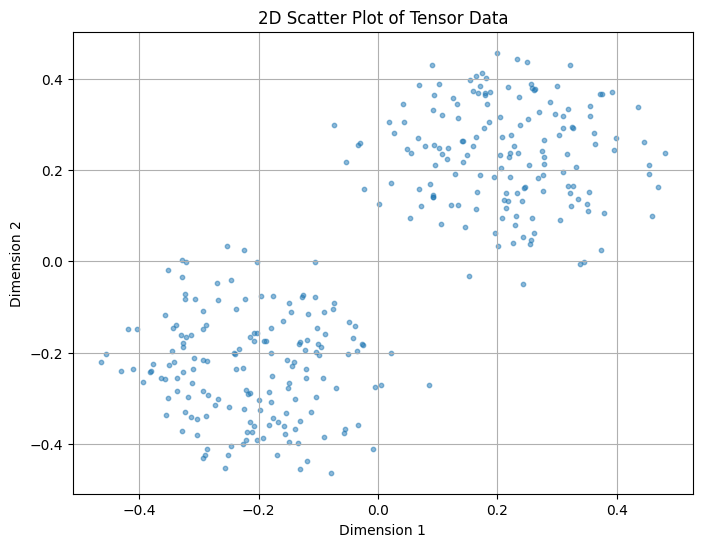

In [31]:
data_np = d[0]

# Extract x and y columns
x = data_np[:, 0]
y = data_np[:, 1]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, s=10) # alpha for transparency, s for dot size
plt.title("2D Scatter Plot of Tensor Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

In [ ]:
# function to plot posterior samples
# function to compare MMD